# 文本表示

## 1.文本表示概述
文本表示，简单的说就是不将文本视为字符串，而视为在**数学上处理起来更为方便的向量**。而怎么把字符串变为向量，就是文本表示的核心问题。

### 1.1 为什么要进行文本表示
1. 根本原因是计算机不方便直接对文本字符串进行处理，因此需要进行数值化或者向量化。
2. 便于机器学习。不仅传统的机器学习算法需要这个过程，深度学习也需要这个过程。
3. 良好的文本表示形式可以极大的提升算法效果。

### 1.2 文本表示分类（基于粒度）
* 文本表示
* 句子表示（短文本）
* 词表示

### 1.3 文本表示分类（基于表示方法）
* 离散表示
 * one-hot表示
 * multi-hot表示
* 分布式表示
 * 基于矩阵
   * 基于降维的方法
   * 基于聚类的方法
 * 基于神经网络
   * CBOW
   * Skip-gram
   * NNLM
   * C&W

## 2. 文本离散表示：词袋模型与TF-IDF

### 2.1 最简单的文本表示：词袋子模型（bag of words）

词袋子模型是一种非常经典的文本表示。顾名思义，它就是将字符串视为一个 **“装满字符（词）的袋子”** ，袋子里的 **词语是随便摆放的**。而两个词袋子的相似程度就以它们重合的词及其相关分布进行判断。

![图片](http://ww1.sinaimg.cn/large/b57cc2efly1fxcjker3m9j205k07kq3u.jpg)

举个例子，对于句子：
>“我们这些傻傻的路痴走啊走，好不容易找到了饭店的西门”。

我们先进行**分词**，将所有出现的词储存为一个词表。然后依据 **“词语是否出现在词表中”** 可以将这句话变为这样的向量：

> [1,0,1,1,1,0,0,1,…]

> 词表：[我们，你们，走，西门，的，吃饭，旅游，找到了,...]

其中向量的**每个维度唯一对应着词表中的一个词**。可见这个向量的大部分位置是0值，这种情况叫作**“稀疏”**。为了减少存储空间，我们也可以只储存非零值的位置。

在实际应用中，这种方法非常常用。

#### 2.1.1 词袋子模型的优点

1. 简单，方便，快速
2. 在语料充足的前提下，对于简单的自然语言处理任务效果不错。如文本分类。

#### 2.1.2 词袋子模型的缺点
1. 其准确率往往比较低。凡是出现在文本中的词一视同仁，不能体现不同词在一句话中的不同的重要性。
2. **无法关注词语之间的顺序关系，这是词袋子模型最大的缺点**。如“武松打老虎”跟“老虎打武松”在词袋子模型中是认为一样的。

### 2.2 对词袋子模型的改进：TF-IDF

#### 2.2.1 不仅考虑词语是否出现，还考虑其出现的次数或者频率（TF）
> [1,0,2,1,2,0,0,1,…]

> 词表：[我们，你们，走，西门，的，吃饭，旅游，找到了,...]

“的”这个次占了词频的很大的比重，而它对确定文本信息几乎没什么用。所以我们应该忽略掉这些词，取消掉它们的影响。一种方法是维护一个停用词表。但这种方式太粗暴。

改进方式：一个词预测主题的能力越强（与主题的关联程度），权重越大，反之，权重越小。在网页中看到“原子能”这个词，或多或少能够了解网页的主题，而看到“应用”一词，则对主题基本上还是一无所知。因此，“原子能”的权重应该比应用大。
容易发现，如果一个关键词只在很少的网页出现，通过它就容易锁定搜索目标，它的权重也就应该比较大。反正，如果一个词在大量的网页中出现，看到它仍然不清楚要找什么内容，因此它的权重应该小。（比如你在搜索“python gensim”，“python”这个关键词会在很多的网页中出现，内容可能是python入门介绍，python官网，python应用，而“gensim”却只会在相对比较少的网页中出现，一般所以gensim的官网，gensim的安装教程，gensim的学习笔记等，而后者是我们更倾向于看到的内容）。

#### 2.2.2 统计逆文档频率——**IDF**

不仅考虑这个词在当下文本的出现的概率，还考虑出现该词语的文档占总文档出现的频率（DF）。其基本假设是**如果一个词语在不同的文档中反复出现，那么它对于识别该文本并不重要**。如高频词“我们”、“那么”之类。

严格来说，逆文档频率的公式为-log(出现该词语的文档占总文档出现的频率)

如关键字“python”在10万个网页中出现，而“gensim”只在1000个网页中出现，那么“gensim”的权重就会比“python”多，这样搜索出来的结果就与你想要的结果越贴近。比如，假定中文网页数是=10亿，停止词的在所有的网页中都出现，即D=10亿，那么它的IDF = log(10亿 / 10亿) = log(1) =0。假如专用词“原子能”在两百万个网页中出现，即Dw=200万，则它的权重IDF=log(500) =2.7。又假定通用词“应用”，出现在五亿个网页中，它的权重IDF = log(2)则只有 0.3。

![图片](http://ww1.sinaimg.cn/large/b57cc2efly1fxcjkg43yxj218g0pktow.jpg)

TF-IDF的概念被公认为信息检索中最重要的发明。在搜索，文献分类，与其他相关领域有广泛的应用。



## 3.文本分布式表示：word2vec
* **参考笔记**：[斯坦福cs224d Lecture 1](https://blog.csdn.net/longxinchen_ml/article/details/51567960)

### 3.1 词向量的one-hot表示
我们拿英文举例。

英语中大约有1300万个词组（token，自定义字符串，译作词组），不过他们全部是独立的吗？并不是哦，比如有一些词组，“Feline猫科动物”和“Cat猫”，“Hotel宾馆“和”Motel汽车旅馆”，其实有一定的关联或者相似性在。因此，我们希望用词向量编码词组，使它代表在词组的N维空间中的一个点（而点与点之间有距离的远近等关系，可以体现深层一点的信息）。每一个词向量的维度都可能会表征一些意义（物理含义），这些意义我们用“声明speech”来定义。例如，语义维度可以用来表明时态（过去与现在与未来），计数（单数与复数），和性别（男性与女性）。

说起来，词向量的编码方式其实挺有讲究的。咱们从最简单的看起，最简单的编码方式叫做one-hot vector：假设我们的词库总共有n个词，那我们开一个1*n的高维向量，而每个词都会在某个索引index下取到1，其余位置全部都取值为0.词向量在这种类型的编码中如下图所示：
$$ w^{aardcark}=
\begin{bmatrix}
     1  \\
     0  \\
     0 \\
     \vdots \\
     0
\end{bmatrix} ,
w^{a}=
\begin{bmatrix}
     0  \\
     1  \\
     0 \\
     \vdots \\
     0
\end{bmatrix}
w^{at}=
\begin{bmatrix}
     0  \\
     0  \\
     1 \\
     \vdots \\
     0
\end{bmatrix}
\cdots \\
w^{zebra}=
\begin{bmatrix}
     0  \\
     0  \\
     0 \\
     \vdots \\
     1
\end{bmatrix}
$$
这种词向量编码方式简单粗暴，我们将每一个词作为一个完全独立的个体来表达。遗憾的是，这种方式下，我们的词向量没办法给我们任何形式的词组相似性权衡。例如:
$$(w^{hotel})^Tw^{motel}=(w^{hotel})^Tw^{cat}=0$$
（注：这里$W^{-1}$是$W$的逆矩阵，它们有关系：$W^{-1}*W=1$，注意到hotel和motel是近义词）

究其根本你会发现，是你开了一个极高维度的空间，然后每个词语都会占据一个维度，因此没有办法在空间中关联起来。因此我们可能可以把词向量的维度降低一些，在这样一个子空间中，可能原本没有关联的词就关联起来了。

### 3.2 基于SVD降维的表示方法
这是一种构造词嵌入（即词向量）的方法，我们首先会遍历所有的文本数据集，然后统计词出现的次数，接着用一个矩阵$X$来表示所有的次数情况，紧接着对X进行奇异值分解得到一个$USV^T$的分解。然后用$U$的行（rows）作为所有词表中词的词向量。对于矩阵$X$，我们有几种选择，咱们一起来比较一下。

#### 3.2.1 词-文档矩阵
最初的想法是，我们猜测相互关联的词组同时出现在相同的文件中的概率很高。例如，“银行”、“债券”、“股票”、“钱”等都可能出现在一起。但是，“银行”、“章鱼”、“香蕉”和“曲棍球”可能不会一直一起出现。基于这个想法，我们建立一个词组文档矩阵$X$，具体是这么做的：遍历海量的文件，每次词组i出现在文件j中时，将$X_{ij}$的值加1。不过大家可想而知，这会是个很大的矩阵$R^{|V| ×M}$，而且矩阵大小还和文档个数M有关系。所以咱们最好想办法处理和优化一下。

#### 3.2.2 基于窗口的共现矩阵X
我们还是用一样的逻辑，不过换一种统计方式，把矩阵$X$记录的词频变成一个相关性矩阵。我们先规定一个固定大小的窗口，然后统计每个词出现在窗口中次数，这个计数是针对整个语料集做的。可能说得有点含糊，咱们一起来看个例子，假定我们有如下的3个句子，同时我们的窗口大小设定为1（把原始的句子分拆成一个一个的词）：
1. I enjoy flying.
2. I like NLP.
3. I like deep learning.
由此产生的计数矩阵如下：

![](./img/Co-occurrence_matrix.png)

然后我们对X做奇异值分解，观察观察奇异值（矩阵的对角元素），并根据我们期待保留的百分比来进行截断（只保留前k个维度）：

![](./img/Energy_ratio.png)


然后我们把子矩阵$U_{1:|V|,1:k}$视作我们的词嵌入矩阵。也就是说，对于词表中的每一个词，我们都用一个k维的向量来表达了。

对X采用奇异值分解


![](https://pic4.zhimg.com/80/a01cce7a35161a838df99a655c00a823_hd.png)


通过选择前K个奇异向量来进行降维：


![](https://pic4.zhimg.com/80/44da818d314a1be5b33f8c9c9f9dab33_hd.png)


这两种方法都能产生词向量，它们能够充分地编码语义和句法的信息，但同时也带来了其他的问题：

* 矩阵的维度会经常变化（新的词语经常会增加，语料库的大小也会随时变化）。
* 矩阵是非常稀疏的，因为大多数词并不同时出现。
* 矩阵的维度通常非常高（$≈10^6×10^6$）
* 训练需要$O(n^2)$的复杂度（比如SVD）
* 需要专门对矩阵X进行特殊处理，以应对词组频率的极度不平衡的状况

当然，有一些办法可以缓解一下上述提到的问题：

* 忽视诸如“he”、“the” 、“has”等功能词。
* 应用“倾斜窗口”（ramp window），即:根据文件中词组之间的距离给它们的共现次数增加相应的权重。
* 使用皮尔森的相关性（Pearson correlation），将0记为负数，而不是它原来的数值。

不过缓解终归只是缓解，咱们需要更合理地解决这些问题，这也就是我们马上要提到的基于神经网络的方法。

### 3.3 基于神经网络的表示方法
现在我们退后一步，来尝试一种新的方法。在这里我们并不计算和存储全局信息，因为这会包含太多大型数据集和数十亿句子。我们尝试创建一个模型，它能够一步步迭代地进行学习，并最终得出每个单词基于其上下文的条件概率。

```
词语的上下文：
一个词语的上下文是它周围C个词以内的词。如果C=2，句子"The quick brown fox jumped over the lazy dog"中单词"fox"的上下文为 {"quick", "brown", "jumped", "over"}.
```

我们想建立一个概率模型，它包含已知和未知参数。每增加一个训练样本，它就能从模型的输入、输出和期望输出（标签），多学到一点点未知参数的信息。

在每次迭代过程中，这个模型都能够评估其误差，并按照一定的更新规则，惩罚那些导致误差的参数。这种想法可以追溯到1986年（Learning representations by back-propagating errors. David E. Rumelhart, Geoffrey E. Hinton, and Ronald J.Williams (1988)），我们称之为误差“反向传播”法。

#### 3.3.1 语言模型（1-gram,2-gram等等）
首先，我们需要建立一个能给“分词序列”分配概率的模型。我们从一个例子开始：

`"The cat jumped over the puddle."（猫 跳 过 水坑）`

一个好的语言模型会给这句话以很高的概率，因为这是一个在语法和语义上完全有效的句子。同样地，这句"stock boil fish is toy"（股票 煮 鱼 是 玩具）就应该有一个非常低的概率 ，因为它是没有任何意义的。在数学上，我们可以令任意给定的n个有序的分词序列的概率为：
 $$P(w_1,w_2,w_3...w_n)$$
我们可以采用一元语言模型。它假定词语的出现是完全独立的，于是可以将整个概率拆开相乘：
 $$P(w_1,w_2,w_3...w_n)=\prod_{i=1}^NP(w_i)$$
看到这里，肯定很多同学就要喷了，这不对，词和词之间没有关联吗？确实，我们知道一句话中每一个词语都跟它前面的词语有很强的依赖关系，忽略这一点的话，一些完全无意义的句子，可能会有很高的概率。咱们稍微改一改，让一个词语的概率依赖于它前面一个词语。我们将这种模型称作bigram（2-gram，二元语言模型），表示为：
 $$P(w_1,w_2,w_3...w_n)=\prod_{i=2}^NP(w_i|w_{i-1})$$
看起来还是有点简单？恩，也对，我们只考虑一个词语依赖于其相邻的一个词语的关系，而不是考虑其依赖整个句子的情况。别着急，接下来将会看到，这种方法能让我们有非常显著的进步。考虑到前面 “词-词”矩阵的情况，我们至少可以算出两个词语共同出现的概率。但是，旧话重提，这仍然要求储存和计算一个非常的大数据集里面的全部信息。
现在我们理解了“分词序列”的概率（其实就是N-gram语言模型啦），让我们观察一些能够学习到这些概率的例子。

#### 3.3.2 连续词袋模型（CBOW）
有种模型是以{"The", "cat", ’over", "the’, "puddle"}为上下文，能够预测或产生它们中心的词语"jumped"，叫做连续词袋模型。

上面是最粗粒度的描述，咱们来深入一点点，看点细节。

首先，我们要建立模型的一些已知参数。它们就是将句子表示为一些one-hot向量，作为模型的输入，咱们记为x(c)吧。模型的输出记为y(c)吧。因为连续词袋模型只有一个输出，所以其实我们只需记录它为y。在我们上面举的例子中，y就是我们已经知道的（有标签的）中心词（如本例中的"jumped"）。

好了，已知参数有了，现在我们一起来定义模型中的未知参数。我们建立两矩阵，$V\in R^{n*|V|}$和$U\in R^{|V|*n}$ 。其中的n是可以任意指定的，它用来定义我们“嵌入空间”（embedding space）的维度。V是输入词矩阵。当词语$w_i$（译注：$w_i$是只有第i维是1其他维是0的one-hot向量）作为模型的一个输入的时候，V的第i列就是它的n维“嵌入向量”（embedded vector）。我们将V的这一列表示为$v_i$。类似的，U是输出矩阵。当$w_j$作为模型输出的时候，U的第j行就是它的n维“嵌入向量”。我们将U的这一行表示为$u_j$。要注意我们实际上对于每个词语$w_i$学习了两个向量。（作为输入词的向量$v_i$，和作为输出词的向量$u_j$）。

连续词袋模型（CBOW）中的各个记号：

* $w_i$:单词表V中的第i个单词
* $v\in R^{n*|V|}$：输入词矩阵
* $v_i$：V的第i列，单词$w_i$的输入向量
* $u\in R^{|V|*n}$：输出词矩阵
* $u_i$：U的第i行，单词$w_i$的输出向量

那这个模型是如何运作的呢？我们把整个过程拆分成以下几步：

1.	对于m个词长度的输入上下文，我们产生它们的one-hot向量（$x^{(c-m)},\cdots,x^{(c-1)},x^{(c+1)},\cdots,x^{(c+m)}$）
2.	我们得到上下文的嵌入词向量（$v_{c-m}=Vx^{(c-m)},\cdots,v_{c+m}=Vx^{(c+m)}$）
3.	将这些向量取平均$\hat v={v_{c-m}+v_{c-m+1}+\cdots+v_{c+m}\over2m}$
4.	产生一个得分向量 $z=U\hat v$
5.	将得分向量转换成概率分布形式$\hat y=softmax(z)$
6.	我们希望我们产生的概率分布 ,与真实概率分布$\hat y$相匹配。而$y$刚好也就是我们期望的真实词语的one-hot向量。

用一幅图来表示就是下面这个样子：

![](http://i.stack.imgur.com/fYxO9.png)


通过上面说的种种步骤，我们知道有了矩阵U、V整个过程是如何运作的，那我们怎样找到U和V呢？——我们需要有一个目标函数。通常来说，当我们试图从已知概率学习一个新的概率时，最常见的是从信息论的角度寻找方法来评估两个概率分布的差距。其中广受好评又广泛应用的一个评估差异/损失的函数是交叉熵：

$$H(\hat y,y)=-\sum_{j=1}^{|V|}y_jlog(\hat y_j)$$

结合我们当下的例子，y只是一个one-hot向量，于是上面的损失函数就可以简化为：

$$H(\hat y,y)=-y_ilog(\hat y_i)$$

我们用c表示y这个one-hot向量取值为1的那个维度的下标。所以在我们预测为准确值的情况下$\hat y_c =1$。于是损失为 −1 log(1) = 0。所以对于一个理想的预测值，因为预测得到的概率分布和真实概率分布完全一样，因此损失为0。现在让我们看一个相反的情况，也就是我们的预测结果非常不理想，此时$\hat y_c =0.01$。计算得到的损失为−1 log(0.01) ≈ 4.605，损失非常大，原本这才是标准结果，可是你给了一个非常低的概率，因此会拿到一个非常大的loss 。可见交叉熵为我们提供了一个很好的衡量两个概率分布的差异的方法。于是我们最终的优化函数为：

![](./img/cbow-loss.png)

我们用梯度下降法去更新每一个相关的词向量$u_c$和$v_j$ 。

#### 3.3.3 Skip-Gram 模型
很上面提到的模型对应的另一种思路，是以中心的词语"jumped"为输入，能够预测或产生它周围的词语"The", "cat", ’over", "the”, "puddle"等。这里我们叫"jumped"为上下文。我们把它叫做Skip-Gram 模型。
这个模型的建立与连续词袋模型（CBOM）非常相似，但本质上是交换了输入和输出的位置。我们令输入的one-hot向量（中心词）为x（因为它只有一个），输出向量为y(j)。U和V的定义与连续词袋模型一样。

Skip-Gram 模型中的各个记号：

* $w_i$:单词表V中的第i个单词
* $v\in R^{n*|V|}$：输入词矩阵
* $v_i$：V的第i列，单词$w_i$的输入向量
* $u\in R^{|V|*n}$：输出词矩阵
* $u_i$：U的第i行，单词$w_i$的输出向量

对应到上面部分，我们可以把Skip-Gram 模型的运作方式拆分成以下几步：

1.	生成one-hot输入向量x。
2.	得到上下文的嵌入词向量$v_c=Vx$。
3.	因为这里不需要取平均值的操作，所以直接是$\hat v=v_c$。
4.	通过$u=Uv_c$产生2m个得分向量$u_{c-m},\cdots,u_{c-1},u_{c+1},\cdots,u_{c+m}$。
5.	将得分向量转换成概率分布形式$y=softmax(u)$。
6.	我们希望我们产生的概率分布与真实概率分布$y^{c-m},\cdots,y^{c-1},,y^{c+1}\cdots,y^{c+m}$ 相匹配，也就是我们真实输出结果的one-hot向量。

用一幅图来表示这个过程如下：

![](http://i.stack.imgur.com/igSuE.png)

像连续词袋模型一样，我们需要为模型设定一个目标/损失函数。不过不同的地方是我们这里需要引入朴素贝叶斯假设来将联合概率拆分成独立概率相乘。如果你之前不了解它，可以先跳过。这是一个非常强的条件独立性假设。也就是说只要给出了中心词，所有的输出词是完全独立的。

![](./img/sg-loss.png)

我们可以用随机梯度下降法去更新未知参数的梯度。

#### 3.3.4 负例采样（Negative Sampling）
我们再次观察一下目标函数，注意到对整个单词表|V|求和的计算量是非常巨大的，任何一个对目标函数的更新和求值操作都会有O(|V|)的时间复杂度。我们需要一个思路去简化一下，我们想办法去求它的近似。
对于每一步训练，我们不去循环整个单词表，而只是抽象一些负面例子就够了！我们可以从一个噪声分布$(P_n(w))$中抽样，其概率分布与单词表中的频率相匹配。为了将描述问题的公式与负例采样相结合，我们只需要更新我们的：

* 目标函数
* 梯度
* 更新规则

Mikolov ET AL.在他的《Distributed Representations of Words and Phrases and their Compositionality》中提出了负例采样。虽然负例采样是基于Skip-Gram 模型，它实际上是对一个不同的目标函数进行最优化。考虑一个“词-上下文”对（w,c），令P(D = 1|w, c)为(w, c)来自于语料库的概率。相应的，P(D = 0|w, c) 则是不来自于语料库的概率。我们首先对P(D = 1|w, c)用sigmoid函数建模：
$$p(D=1|w,c,\theta)= {1\over{1+e^{(-v_c^Tv_w)}}}$$
现在我们需要建立一个新的目标函数。如果(w, c)真是来自于语料库，目标函数能够最大化P(D = 1|w, c)。反之亦然。我们对这两个概率采用一个简单的最大似然法。（这里令θ为模型的参数，在我们的例子中，就是对应的U和V。）

![](./img/sgns-loss.png)


注意这里的$\widetilde D$表示“错误的”或者“负面的”语料库，像句子"stock boil fish is toy"就是从这样的语料库来的。不自然的句子应该有比较低的发生概率，我们可以从词库中随机采样来产生这样的“负面的”语料库。我们的新目标函数就变成了：

$$\sum_{j=0,j\neq m}^{2m}log\sigma(u_{c-m+j}^T.v_c)+\sum_{k=1}^Klog\sigma(-\widetilde u_k^T.v_c)$$

在这里$\{\widetilde u_k|k=1,\cdots,K\}$是从(Pn(w))中抽样取到的。需要多说一句的是，虽然关于怎么样最好地近似有许多讨论和研究，但是工作效果最好的似乎是指数为3/4的一元语言模型。至于为什么是3/4，下面有几个例子来帮助大家感性地理解一下：

$$is:0.9^{3/4}=0.92\\
constitution:0.09^{3/4}=0.16 \\
bombastic:0.01^{3/4}=0.032$$

你看，经过3/4这样一个指数处理，"Bombastic"(少见)被采样的概率是之前的3倍，而“is”这个词(多见)被采样的概率只是稍微增长了一点点。

### 3.4 词向量的作用与获取

很多高阶的深度学习自然语言处理任务，都可以用词向量作为基础。我们课程后面的很多任务，可以用预训练好的word2vec初始化。可以从[开源链接](https://github.com/Embedding/Chinese-Word-Vectors)获取。

![](./img/Pre-training_word_vector.png)



### 3.5 词向量为什么有用

* 基于词与其他词的某种共现关系
 * sgns 与 PMI矩阵 的等价性证明, 降维版本不等价。《Neural-Word-Embeddings-as-Implicit-Matrix-Factorization》
     * 神经网络与SVD的求解方法只是降维方式的不同
     * 神经网络更像MF，而MF与SVD的降维的约束条件不同，神经网络的目标函数与MF的目标函数也不同
 * GloVe与MF关系更近
     * 目标函数更像
     * CBOW没有类似的降维矩阵对应
* 基于语言模型
 * 词向量与语言模型本来是两个独立的NLP问题领域，因为深度学习联系在了一起。CBOW。
 * 基于词向量构建成句子向量进而进而完成语言模型的任务
* 基于其他监督学习任务
 * 词向量并不只是语言模型可以得到，基于有监督学习也可以得到：C&W
 * 基于词向量构建成句子向量进而进而完成文本分类或文本相似度判断的任务

## 4.python中文文本向量化表示
* [参考代码](https://github.com/AimeeLee77/keyword_extraction)
* [python实现tfidf](https://github.com/Jasonnor/tf-idf-python)

In [3]:
#!/usr/bin/python
# coding=utf-8
# 采用TF-IDF方法提取文本关键词
import sys,codecs
import pandas as pd
import numpy as np
import jieba.posseg
import jieba.analyse
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
"""
       TF-IDF权重：
           1、CountVectorizer 构建词频矩阵
           2、TfidfTransformer 构建tfidf权值计算
           3、文本的关键字
           4、对应的tfidf矩阵
"""
# 数据预处理操作：分词，词性筛选
def dataPrepos(text):
    l = []
    pos = ['n', 'nz', 'v', 'vd', 'vn', 'l', 'a', 'd']  # 定义选取的词性
    seg = jieba.posseg.cut(text)  # 分词
    for i in seg:
        if i.word and i.flag in pos:  # 词性筛选
            l.append(i.word)
    return l

# tf-idf获取文本top10关键词
def getKeywords_tfidf(data,topK):
    idList, titleList, abstractList = data['id'], data['title'], data['abstract']
    corpus = [] # 将所有文档输出到一个list中，一行就是一个文档
    for index in range(len(idList)):
        text = '%s。%s' % (titleList[index], abstractList[index]) # 拼接标题和摘要
        text = dataPrepos(text) # 文本预处理
        text = " ".join(text) # 连接成字符串，空格分隔
        corpus.append(text)

    # 1、构建词频矩阵，将文本中的词语转换成词频矩阵
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus) # 词频矩阵,a[i][j]:表示j词在第i个文本中的词频
    # 2、统计每个词的tf-idf权值
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(X)
    # 3、获取词袋模型中的关键词
    word = vectorizer.get_feature_names()
    # 4、获取tf-idf矩阵，a[i][j]表示j词在i篇文本中的tf-idf权重
    weight = tfidf.toarray()
    # 5、打印词语权重
    ids, titles, keys = [], [], []
    for i in range(len(weight)):
        print(u"-------这里输出第", i+1 , u"篇文本的词语tf-idf------")
        ids.append(idList[i])
        titles.append(titleList[i])
        df_word,df_weight = [],[] # 当前文章的所有词汇列表、词汇对应权重列表
        for j in range(len(word)):
            print (word[j],weight[i][j])
    
    return corpus


def main():
    # 读取数据集
    dataFile = '/data/NLP/sample_data.csv'
    data = pd.read_csv(dataFile)
    # tf-idf关键词抽取
    global corpusA
    corpusA = getKeywords_tfidf(data,10)
    

corpusA = []
main()

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.783 seconds.
Prefix dict has been built succesfully.


-------这里输出第 1 篇文本的词语tf-idf------
一定 0.054830755756848815
一段时间 0.0
主体 0.0
乘客 0.0
乘车 0.0
事件 0.0
二者 0.0
互相 0.0
交叉 0.0
产品 0.0
产生 0.09322230345997895
介绍 0.0
仍然 0.054830755756848815
仪表板 0.0
传感器 0.054830755756848815
估计 0.0
位置 0.0407792498624949
作为 0.0
使得 0.0
使用 0.0
使能 0.054830755756848815
使该 0.0
信号 0.09322230345997895
倾斜 0.0
偏压 0.0
停转 0.0
储能 0.0
元件 0.0
免受 0.0
关闭 0.0
具有 0.0
内燃机 0.0
内管 0.0
凹陷 0.0
分析 0.0
分部 0.0
分隔 0.0
切换 0.054830755756848815
利用 0.0
制动 0.10966151151369763
制造 0.0
刹车 0.054830755756848815
力矩 0.16449226727054644
功能 0.054830755756848815
包围 0.0
包括 0.0
单元 0.21932302302739526
卸载 0.0
参数 0.0
发生器 0.0
变型 0.0
变速器 0.0
启动 0.0
吸收 0.0
命令 0.0
围绕 0.0
地向 0.0
坡道 0.10966151151369763
基准 0.0
增加 0.0
处于 0.054830755756848815
处在 0.0
大于 0.054830755756848815
大巴车 0.10966151151369763
头枕 0.0
安排 0.0
安装 0.0
定位 0.0
实施 0.0
实现 0.054830755756848815
容量 0.0
导引 0.0
小于 0.10966151151369763
峰值 0.0
布置 0.0
座椅 0.0
延伸 0.0
开启 0.0
开始 0.0
开度 0.10966151151369763
引到 0.0
形成 0.0
总和 0.0
总成 0.0
恢复 0.054830755756848815
悬挂 0.0
成使 0.0
手刹 

设计 0.0
评估 0.0
负荷 0.0
货物 0.0
货箱 0.0
起步 0.0
越过 0.10397375775779942
踏板 0.0
踩下 0.0
车厢 0.0
车身 0.0
车辆 0.0
车门 0.0
转速 0.0
轴线 0.0
辅助 0.0
输出 0.0
过程 0.0
运行 0.0
运输工具 0.0
进入 0.0
远离 0.0
退出 0.0
速度 0.0
邻接 0.0
邻近 0.0
部上 0.0
部分 0.07732834954072673
部向 0.0
配置 0.0
重叠 0.0
重启 0.0
铰接 0.0
闭环控制 0.0
间隔 0.0
间隙 0.0
防止 0.0
防溜 0.0
降低 0.0
限制 0.0
限定 0.0
随后 0.0
靠背 0.0
靠近 0.0
面板 0.0
首先 0.0
驱动 0.0
驱动器 0.0
驻车 0.0
-------这里输出第 7 篇文本的词语tf-idf------
一定 0.0
一段时间 0.0
主体 0.28055482201972454
乘客 0.0
乘车 0.0
事件 0.0
二者 0.0
互相 0.07013870550493113
交叉 0.0
产品 0.0
产生 0.0
介绍 0.0
仍然 0.0
仪表板 0.0
传感器 0.0
估计 0.0
位置 0.0
作为 0.0
使得 0.0
使用 0.0
使能 0.0
使该 0.0
信号 0.0
倾斜 0.0
偏压 0.0
停转 0.0
储能 0.0
元件 0.0
免受 0.0
关闭 0.0
具有 0.0
内燃机 0.0
内管 0.0
凹陷 0.0
分析 0.0
分部 0.0
分隔 0.0
切换 0.0
利用 0.0
制动 0.0
制造 0.16501451210303722
刹车 0.0
力矩 0.0
功能 0.0
包围 0.0
包括 0.0
单元 0.0
卸载 0.0
参数 0.0
发生器 0.0
变型 0.0
变速器 0.0
启动 0.0
吸收 0.0
命令 0.0
围绕 0.0
地向 0.0
坡道 0.0
基准 0.0
增加 0.0
处于 0.0
处在 0.0
大于 0.0
大巴车 0.0
头枕 0.0
安排 0.0
安装 0.16501451210303722
定位 0.0
实施 0.0
实现 0.0
容量 0.0
导引 0.0
小于 0.0
峰值 

## 5.基于gensim的中文文本词向量训练与相似度匹配

In [4]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec


In [5]:
corpusA = [i.split(" ") for i in corpusA]

In [6]:
corpusA

[['永磁',
  '电机',
  '驱动',
  '纯',
  '电动',
  '大巴车',
  '坡道',
  '起步',
  '防溜',
  '策略',
  '本发明',
  '永磁',
  '电机',
  '驱动',
  '纯',
  '电动',
  '大巴车',
  '坡道',
  '起步',
  '防溜',
  '策略',
  '即',
  '策略',
  '制动',
  '踏板',
  '已',
  '踩下',
  '永磁',
  '电机',
  '转速',
  '小于',
  '设定值',
  '持续',
  '一定',
  '时间',
  '整车',
  '控制',
  '单元',
  '产生',
  '刹车',
  '触发',
  '信号',
  '油门',
  '踏板',
  '开度',
  '小于',
  '设定值',
  '档位',
  '装置',
  '时',
  '电机',
  '控制',
  '单元',
  '产生',
  '防溜',
  '功能',
  '使能',
  '信号',
  '自动',
  '进入',
  '防溜',
  '控制',
  '使',
  '永磁',
  '电机',
  '进入',
  '转速',
  '闭环控制',
  '目标',
  '转速',
  '整车',
  '控制',
  '单元',
  '检测',
  '到',
  '制动',
  '踏板',
  '仍然',
  '踩下',
  '则',
  '限制',
  '永磁',
  '电机',
  '输出',
  '力矩',
  '恢复',
  '永磁',
  '电机',
  '输出',
  '力矩',
  '整车',
  '控制',
  '单元',
  '检测',
  '到',
  '油门',
  '踏板',
  '开度',
  '大于',
  '设置',
  '值',
  '档位',
  '装置',
  '手刹',
  '装置',
  '处于',
  '驻车',
  '位置',
  '则',
  '退出',
  '防溜',
  '控制',
  '切换',
  '到',
  '力矩',
  '控制',
  '策略',
  '无需',
  '更改',
  '车辆',
  '结构',
  '添加',
  '辅助',
  '传感器',
  '硬件',
  '设

In [7]:
model = Word2Vec(corpusA, size=100, window=5, min_count=1, workers=4, sg = 1, negative = 5, ns_exponent = 0.75)

In [8]:
model.most_similar('最靠近')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('椅背', 0.43153685331344604),
 ('具有', 0.424590140581131),
 ('手动', 0.4134489595890045),
 ('驱动器', 0.4102057218551636),
 ('方式', 0.39596235752105713),
 ('操作', 0.3881428837776184),
 ('自动', 0.3764950931072235),
 ('方法', 0.3684544563293457),
 ('确定', 0.3612304925918579),
 ('转速', 0.3547886610031128)]

In [7]:
model.save("data/w2v")

## 6.Tensorflow训练中文词向量，并可视化

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
from __future__ import print_function
import collections
import math
import numpy as np
import os
import random
import tensorflow as tf
import zipfile
from matplotlib import pylab
from matplotlib import font_manager
from six.moves import range
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from sklearn.manifold import TSNE

In [9]:
vocabulary_size = 3000

def build_dataset(words):
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
  dictionary = dict()
  for word, _ in count:
    dictionary[word] = len(dictionary)
  data = list()
  unk_count = 0
  for word in words:
    if word in dictionary:
      index = dictionary[word]
    else:
      index = 0  # dictionary['UNK']
      unk_count = unk_count + 1
    data.append(index)
  count[0][1] = unk_count
  reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 
  return data, count, dictionary, reverse_dictionary

def maybe_pickle(target_data, set_filename, force=False):
  if os.path.exists(set_filename) and not force:
    if os.path.getsize(set_filename) > 0:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
      return set_filename
  print('Pickling %s.' % set_filename)
  try:
    with open(set_filename, 'wb') as f:
      pickle.dump(target_data, f, pickle.HIGHEST_PROTOCOL)
  except Exception as e:
    print('Unable to save data to', set_filename, ':', e)

#with open("wiki_cn_chunk.txt", 'r') as f:
def loadData(data_file="./datat/data.pickle", count_file="./data/count.pickle", dict_file="./data/dictionary.pickle", rev_dict_file="./data/reverse_dictionary.pickle", force=False):
  if os.path.exists(data_file) and os.path.exists(count_file) and os.path.exists(dict_file) and os.path.exists(rev_dict_file) and not force:
    try:
      print("Pickle files found, try to load data from pickle files...")
      with open(data_file, 'rb') as f:
        data = pickle.load(f)
      with open(count_file, 'rb') as f:
        count = pickle.load(f)
      with open(dict_file, 'rb') as f:
        dictionary = pickle.load(f)
      with open(rev_dict_file, 'rb') as f:
        reverse_dictionary = pickle.load(f)
      print("Data loaded from pickle files successfully")
      print('Most common words (+UNK)', count[:5])
      print('Least common words', count[-10:])
      print('Sample data', data[:10])
      return data, count, dictionary, reverse_dictionary
    except Exception as e:
      print('Unable to load data', ':', e)
  else:
    #lines = tf.compat.as_str(f.read().decode("utf-8")).strip().split()
    #lines = f.read().strip().decode("utf-8", "ignore").split()
    #print(lines[:10])
    global corpusA
    words = []
    for line in corpusA:
        words.extend(list(line))
    print('Data size %d' % len(words))
    print(words[:10])

    print("Cooking data from words loaded...")
    data, count, dictionary, reverse_dictionary = build_dataset(words)
    print('Most common words (+UNK)', count[:5])
    print('Least common words', count[-10:])
    print('Sample data', data[:10])
    del words  # Hint to reduce memory.

    print("Saving cooked data into pickle files...")
    maybe_pickle(dictionary, "dictionary.pickle")
    maybe_pickle(reverse_dictionary, "reverse_dictionary.pickle")
    maybe_pickle(count, "count.pickle")
    maybe_pickle(data, "data.pickle")
  return data, count, dictionary, reverse_dictionary

data, count, dictionary, reverse_dictionary = loadData()

Data size 783
['永磁', '电机', '驱动', '纯', '电动', '大巴车', '坡道', '起步', '防溜', '策略']
Cooking data from words loaded...
Most common words (+UNK) [['UNK', 0], ('结构', 27), ('部', 16), ('织物', 16), ('侧', 15)]
Least common words [('使能', 1), ('更改', 1), ('恢复', 1), ('二者', 1), ('监测', 1), ('设备', 1), ('相交', 1), ('定位', 1), ('间隙', 1), ('配置', 1)]
Sample data [36, 29, 51, 143, 142, 104, 88, 145, 33, 43]
Saving cooked data into pickle files...
Pickling dictionary.pickle.
Pickling reverse_dictionary.pickle.
Pickling count.pickle.
Pickling data.pickle.


In [10]:
data_index = 0

def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1 # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)
  for _ in range(span):
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
  for i in range(batch_size // num_skips):
    target = skip_window  # target label at the center of the buffer
    targets_to_avoid = [ skip_window ]
    for j in range(num_skips):
      while target in targets_to_avoid:
        target = random.randint(0, span - 1)
      targets_to_avoid.append(target)
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[target]
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
  return batch, labels

print('data:', [reverse_dictionary[di] for di in data[:8]])

for num_skips, skip_window in [(2, 1), (4, 2)]:
    data_index = 0
    batch, labels = generate_batch(batch_size=16, num_skips=num_skips, skip_window=skip_window)
    print('\nwith num_skips = %d and skip_window = %d:' % (num_skips, skip_window))
    print('    batch:', [reverse_dictionary[bi] for bi in batch])
    print('    labels:', [reverse_dictionary[li] for li in labels.reshape(16)])


data: ['永磁', '电机', '驱动', '纯', '电动', '大巴车', '坡道', '起步']

with num_skips = 2 and skip_window = 1:
    batch: ['电机', '电机', '驱动', '驱动', '纯', '纯', '电动', '电动', '大巴车', '大巴车', '坡道', '坡道', '起步', '起步', '防溜', '防溜']
    labels: ['驱动', '永磁', '电机', '纯', '电动', '驱动', '大巴车', '纯', '坡道', '电动', '大巴车', '起步', '防溜', '坡道', '策略', '起步']

with num_skips = 4 and skip_window = 2:
    batch: ['驱动', '驱动', '驱动', '驱动', '纯', '纯', '纯', '纯', '电动', '电动', '电动', '电动', '大巴车', '大巴车', '大巴车', '大巴车']
    labels: ['电动', '纯', '永磁', '电机', '驱动', '电动', '电机', '大巴车', '纯', '大巴车', '坡道', '驱动', '起步', '纯', '电动', '坡道']


In [11]:
batch_size = 128
embedding_size = 128 # Dimension of the embedding vector.
skip_window = 2 # How many words to consider left and right.
num_skips = 4 # How many times to reuse an input to generate a label.
# We pick a random validation set to sample nearest neighbors. here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. 
valid_size = 16 # Random set of words to evaluate similarity on.
valid_window = 100 # Only pick dev samples in the head of the distribution.
valid_examples = np.array(random.sample(range(valid_window), valid_size))
num_sampled = 64 # Number of negative examples to sample.

graph = tf.Graph()

with graph.as_default(), tf.device('/cpu:0'):

  # Input data.
  train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
  train_labels = tf.placeholder(tf.float32, shape=[batch_size, 1])
  valid_dataset = tf.constant(valid_examples, dtype=tf.int32)
  
  # Variables.
  embeddings = tf.Variable(
    tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
  softmax_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                         stddev=1.0 / math.sqrt(embedding_size)))
  softmax_biases = tf.Variable(tf.zeros([vocabulary_size]))
  
  # Model.
  # Look up embeddings for inputs.
  embed = tf.nn.embedding_lookup(embeddings, train_dataset)
  # Compute the softmax loss, using a sample of the negative labels each time.
  loss = tf.reduce_mean(
    tf.nn.sampled_softmax_loss(softmax_weights, softmax_biases, train_labels,  embed,
                               num_sampled, vocabulary_size))

  # Optimizer.
  # Note: The optimizer will optimize the softmax_weights AND the embeddings.
  # This is because the embeddings are defined as a variable quantity and the
  # optimizer's `minimize` method will by default modify all variable quantities 
  # that contribute to the tensor it is passed.
  optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)
  
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
  normalized_embeddings = embeddings / norm


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
num_steps = 6001
#num_steps = 100001
#num_steps = 5000001
#max_steps = len(data) * num_skips - 100

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  average_loss = 0
  for step in range(num_steps):
    batch_data, batch_labels = generate_batch(
      batch_size, num_skips, skip_window)
    feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
    _, l = session.run([optimizer, loss], feed_dict=feed_dict)
    average_loss += l
    if step % 2000 == 0:
      if step > 0:
        average_loss = average_loss / 2000
      # The average loss is an estimate of the loss over the last 2000 batches.
      print('Average loss at step %d: %f' % (step, average_loss))
      average_loss = 0
  final_embeddings = normalized_embeddings.eval()

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Initialized
Average loss at step 0: 5.761660
Average loss at step 2000: 1.798778
Average loss at step 4000: 1.446995
Average loss at step 6000: 1.372941


## 7.中文词向量可视化

In [13]:
num_points = 200

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(final_embeddings[1:num_points+1, :])

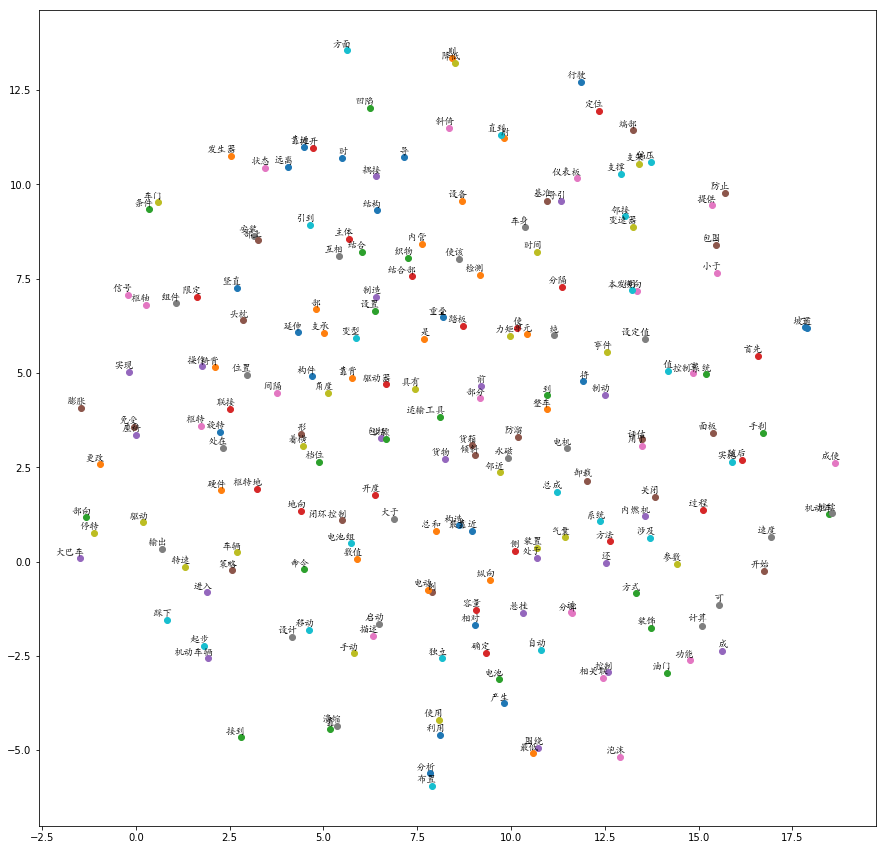

In [14]:
myfont = font_manager.FontProperties(fname='/usr/share/fonts/zh/STKAITI.TTF')

def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom',fontproperties=myfont)
  pylab.show()

words = [reverse_dictionary[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)
